In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import os
from PIL import Image
from collections import defaultdict, Counter
from torchvision import transforms

# 1. Analyse approfondie du jeu de données

In [172]:
ds = load_dataset("DBQ/Chanel.Product.prices.Germany")
df = ds["train"].to_pandas()
df.columns

Index(['website_name', 'competence_date', 'country_code', 'currency_code',
       'brand', 'category1_code', 'category2_code', 'category3_code',
       'product_code', 'title', 'itemurl', 'imageurl', 'full_price', 'price',
       'full_price_eur', 'price_eur', 'flg_discount'],
      dtype='object')

# 1.1. Exploration initiale 

### 1.1.1. Analyse des colonnes du dataset

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

In [121]:
df.head()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount,title_len
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0,0,8
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0,0,1
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0,0,1
3,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,580.0,580.0,580.0,0,5
4,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,480.0,480.0,480.0,0,7


##### 1.1.1.1. Colonne category2_code

In [173]:
# nombre d'occurence de chaque catégorie 
df['category2_code'].value_counts()

category2_code
READY-TO-WEAR                  243
COSTUME JEWELRY                127
SUNGLASSES                      99
WOMEN                           88
WATCHES                         87
MEN                             72
HANDBAGS                        61
COCO CRUSH                      54
SHOES                           42
FACE                            41
EYEGLASSES                      40
SMALL LEATHER GOODS             38
BATH AND BODY                   36
EYES                            35
MOISTURIZERS                    35
RINGS                           35
NECKLACES                       30
BRUSHES AND ACCESSORIES         26
EARRINGS                        26
BLUE LIGHT GLASSES              24
LIPS                            21
N°5                             15
EXCEPTIONAL PIECES              11
CLEANSERS & MAKEUP REMOVERS     11
TONERS & LOTIONS                11
BELTS                           10
BRACELETS                        9
OILS                             9
HEADW

In [174]:
# Nombre de catégorie unique
len(df['category2_code'].unique())

51

In [95]:
# Pourcentage de chaque catégorie dans le dataset. Reviens à diviser le nombre d'occurence de la catégorie par 1428.
df['category2_code'].value_counts(normalize=True) * 100

category2_code
READY-TO-WEAR                  17.016807
COSTUME JEWELRY                 8.893557
SUNGLASSES                      6.932773
WOMEN                           6.162465
WATCHES                         6.092437
MEN                             5.042017
HANDBAGS                        4.271709
COCO CRUSH                      3.781513
SHOES                           2.941176
FACE                            2.871148
EYEGLASSES                      2.801120
SMALL LEATHER GOODS             2.661064
BATH AND BODY                   2.521008
EYES                            2.450980
MOISTURIZERS                    2.450980
RINGS                           2.450980
NECKLACES                       2.100840
BRUSHES AND ACCESSORIES         1.820728
EARRINGS                        1.820728
BLUE LIGHT GLASSES              1.680672
LIPS                            1.470588
N°5                             1.050420
EXCEPTIONAL PIECES              0.770308
CLEANSERS & MAKEUP REMOVERS     0.770308
T

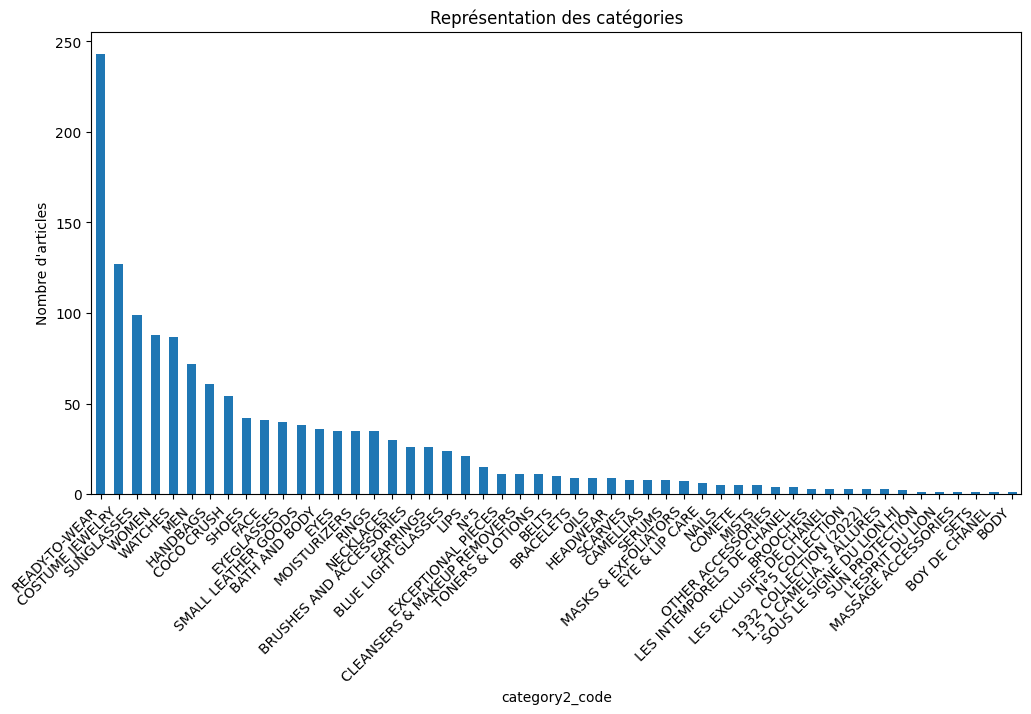

In [96]:
# Histogramme de représentation des catégories
plt.figure(figsize=(12, 6))
df['category2_code'].value_counts().plot(kind='bar')
plt.title("Représentation des catégories")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=45, ha='right')
plt.show()


La colonne category2_code représente la catégorie spécifique de chaque produit Chanel. Le dataset contient 51 catégories distinctes, mais leur distribution est déséquilibrée. Certaines catégories dominent, comme READY-TO-WEAR (17 %), COSTUME JEWELRY (8.9 %) ou SUNGLASSES (6.9 %), alors que la majorité de catégories rares ne représentent chacune que moins de 1 % du dataset.
Ce déséquilibre crée un biais important, qui devra être pris en compte lors de l’entraînement du modèle de classification visuelle, puisque les classes minoritaires ne disposent pas d’assez d’exemples pour permettre un apprentissage robuste.

### 1.1.1.2. Colonne Titre

In [97]:
# Affichage des 10 premiers titres
df['title'].head(10)

0    Tweed & goldfarbenes Metall  Schwarz  Rosa & B...
1                                                 n.a.
2                                              Schwarz
3             Silberfarben. Gläser: Braun  Mit Verlauf
4               Blau & Rosa. Gläser: Grau  Mit Verlauf
5                   Schwarz. Gläser: Grau  Mit Verlauf
6                            Rosa & Weiß. Gläser: Rosa
7                       Silberfarben. Gläser: Bordeaux
8            18 Karat Weißgold  Diamanten  Zuchtperlen
9                        Steppmotiv  18 Karat Gelbgold
Name: title, dtype: object

In [98]:
# Verification des titres absents.
df['title'].isna().sum()

np.int64(0)

In [99]:
# Verification des doublons.
df['title'].duplicated().sum()

np.int64(604)

In [100]:
# Nombre de titres uniques.
df['title'].value_counts()

title
18 Karat Weißgold  Diamanten                        68
n.a.                                                46
Schwarz. Gläser: Grau  Mit Verlauf                  21
EAU DE PARFUM ZERSTÄUBER                            18
LES EXCLUSIFS DE CHANEL - EAU DE PARFUM             17
                                                    ..
Kaschmir & Mohair  Beige  Schwarz & Korallenrosa     1
TASCHENSPIEGEL MIT ZWEI FACETTEN                     1
PRÄZISER PUDER-PINSEL                                1
REICHHALTIGKEIT - SCHUTZ - AUFHELLENDE WIRKUNG       1
PARFUM ZERSTÄUBER                                    1
Name: count, Length: 824, dtype: int64

In [101]:
# Affichage des titres dupliqués. 
df[df['title'].duplicated()]['title'].unique()

array(['Schwarz', 'Schwarz. Gläser: Grau  Mit Verlauf',
       'Metall  Lammleder & Strass  Goldfarben  Schwarz & Kristall',
       'Schwarz. Gläser: Transparent', 'n.a.',
       'Metall  Glasperlen & Strass  Goldfarben  Blau & Schwarz',
       'Metall  Glasperlen & Strass  Silberfarben  Schwarz & Kristall',
       '18\xa0Karat Rotgold  Diamanten',
       'Glänzendes Kalbsleder & goldfarbenes Metall  Schwarz',
       '18 Karat Weißgold  Diamanten',
       '18 Karat Weißgold und Gelbgold  Diamanten',
       '18\xa0Karat Gelbgold  Diamanten',
       'Metall & Strass  Silberfarben & Kristall',
       'Steppmotiv  18 Karat Weißgold  Diamanten',
       'Metall & Harz  Goldfarben & Braun',
       'Steppmotiv  18 Karat Gelbgold  Diamanten',
       '18 Karat BEIGEGOLD  Diamanten', 'Steppmotiv  18 Karat BEIGEGOLD',
       'Steppmotiv  18 Karat Gelbgold',
       'Mittelgroßes Modell  18 Karat Weißgold  Diamanten',
       'Metall  Harz & Strass  Goldfarben  Gelb & Kristall',
       'Großes Modell

In [118]:
# On crée une nouvelle colonne avec la longueur des titres
df["title_len"] = df["title"].apply(lambda t: len(t.split()))

In [ ]:
# Statistiques sur la longueur des titres
df["title_len"].describe()

count    1428.000000
mean        5.094538
std         2.519752
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        19.000000
Name: title_len, dtype: float64

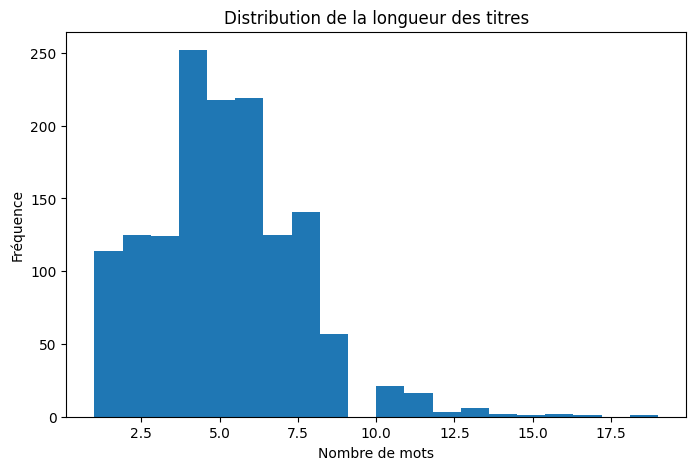

In [ ]:
# Histogramme de la longueur des titres
plt.figure(figsize=(8,5))
plt.hist(df["title_len"], bins=20)
plt.title("Distribution de la longueur des titres")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.show()


La colonne title contient une courte description textuelle en allemand de chaque produit Chanel. L’analyse montre qu’il n’existe aucune valeur manquante, ce qui garantit une bonne qualité de données. En revanche, on observe 604 doublons sur 1428 titres, soit environ 42 % du dataset. 

Les titres sont très courts, avec une moyenne de 5 mots. Ca limite la diversité des mots et ca augmente le nombre de doublons. Notre modéle textuel va surement avoir du mal a ciblé les bons produits.

##### 1.1.1.3. Colonne image

Avant de run la suite, exécuter `src\script\download_images.py`

In [ ]:
# Analyse du nombre d'images
image_dir = "../data/images"

# Récupère seulement les noms de fichiers .jpg
files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Convertit '123.jpg' → 123
available_ids = sorted(int(f.split(".")[0]) for f in files)

# Tous les IDs attendus
expected_ids = set(range(1428))

# IDs présents
present = set(available_ids)

# IDs manquants
missing = sorted(list(expected_ids - present))

print("Nombre d'images présentes :", len(present))
print("Nombre d'images manquantes :", len(missing))
print("IDs manquants :", missing)


Nombre d'images présentes : 899
Nombre d'images manquantes : 529
IDs manquants : [1, 8, 9, 10, 18, 19, 23, 29, 45, 57, 58, 61, 70, 72, 74, 75, 77, 79, 83, 87, 88, 90, 92, 99, 102, 104, 105, 106, 107, 108, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 133, 134, 135, 136, 137, 138, 139, 140, 141, 147, 148, 149, 150, 154, 155, 156, 157, 158, 159, 160, 165, 169, 173, 175, 182, 183, 185, 189, 190, 191, 197, 198, 200, 204, 205, 206, 209, 211, 212, 213, 214, 216, 217, 218, 241, 242, 243, 244, 245, 248, 249, 250, 258, 259, 261, 262, 263, 269, 270, 272, 275, 278, 283, 289, 290, 293, 294, 299, 306, 307, 310, 311, 313, 315, 316, 317, 330, 331, 332, 333, 334, 335, 337, 338, 339, 340, 341, 345, 346, 350, 354, 355, 360, 372, 385, 389, 390, 391, 392, 393, 395, 396, 399, 410, 411, 412, 415, 416, 417, 418, 420, 421, 425, 427, 428, 430, 431, 435, 436, 437, 438, 439, 440, 444, 445, 446, 453, 459, 461, 462, 464, 465, 467, 473, 477, 478, 479, 480, 481, 485, 486, 488, 490, 493, 494, 500, 

In [ ]:
# Analyse des dimensions des images
widths = []
heights = []

for f in files:
    img = Image.open(os.path.join(image_dir, f))
    w, h = img.size
    widths.append(w)
    heights.append(h)

widths = np.array(widths)
heights = np.array(heights)

print("Largeur moyenne :", widths.mean())
print("Hauteur moyenne :", heights.mean())
print("Largeur min / max :", widths.min(), "/", widths.max())
print("Hauteur min / max :", heights.min(), "/", heights.max())


Largeur moyenne : 311.02892102335926
Hauteur moyenne : 361.16685205784205
Largeur min / max : 20 / 392
Hauteur min / max : 41 / 400


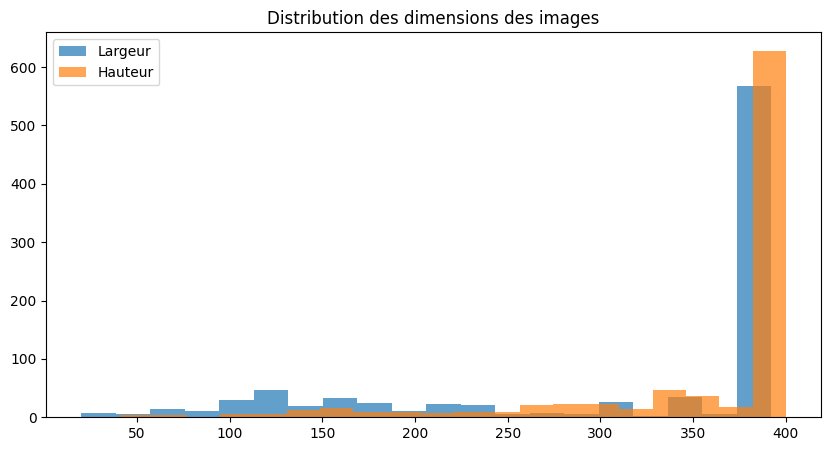

In [ ]:
# Histogramme des dimensions des images
plt.figure(figsize=(10,5))
plt.hist(widths, bins=20, alpha=0.7, label="Largeur")
plt.hist(heights, bins=20, alpha=0.7, label="Hauteur")
plt.legend()
plt.title("Distribution des dimensions des images")
plt.show()


In [ ]:
# Analyse des ratios largeur/hauteur
ratios = widths / heights

print("Ratio moyen :", ratios.mean())
print("Ratio min / max :", ratios.min(), "/", ratios.max())


Ratio moyen : 0.8840647359282059
Ratio min / max : 0.05847953216374269 / 3.4545454545454546


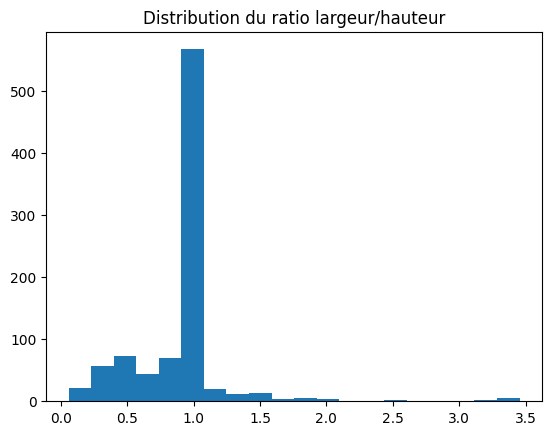

In [ ]:
# Histogramme des ratios
plt.hist(ratios, bins=20)
plt.title("Distribution du ratio largeur/hauteur")
plt.show()


In [ ]:
# Analyse des couleurs moyennes des images
def avg_color(path):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    return arr.mean(axis=(0,1)) 

avg_colors = np.array([
    avg_color(os.path.join(image_dir, f))
    for f in files
])

print("Moyenne R,G,B :", avg_colors.mean(axis=0))


Moyenne R,G,B : [169.62403782 167.78299207 161.43937047]


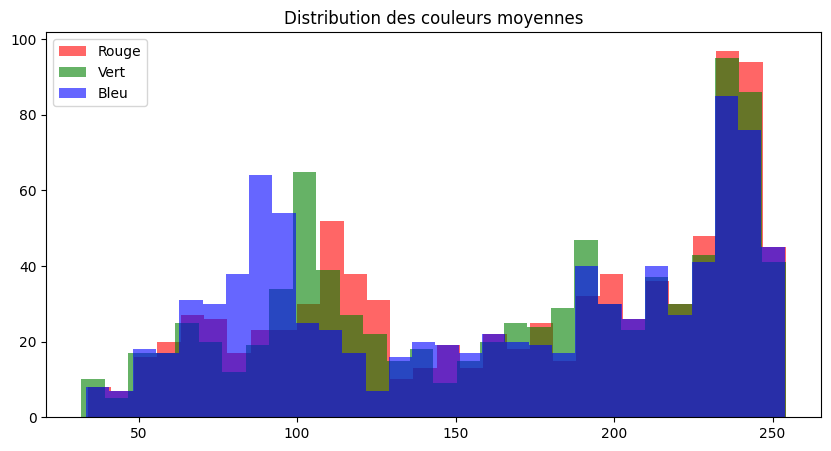

In [ ]:
# Histogramme des couleurs moyennes
plt.figure(figsize=(10,5))
plt.hist(avg_colors[:,0], bins=30, alpha=0.6, label="Rouge", color='red')
plt.hist(avg_colors[:,1], bins=30, alpha=0.6, label="Vert", color='green')
plt.hist(avg_colors[:,2], bins=30, alpha=0.6, label="Bleu", color = 'blue')
plt.legend()
plt.title("Distribution des couleurs moyennes")
plt.show()


In [ ]:
# Analyse des formats d'images par catégorie
image_dir = "../data/images"

formats_count_by_cat = defaultdict(Counter)

for idx, row in df.iterrows():
    img_path = os.path.join(image_dir, f"{idx}.jpg")

    if os.path.exists(img_path):
        try:
            img = Image.open(img_path)
            w, h = img.size
            cat = row["category2_code"]
            formats_count_by_cat[cat][(w, h)] += 1
        except:
            pass


for cat, counter in formats_count_by_cat.items():
    print(f"\n=== {cat} ===")
    total = sum(counter.values())
    print(f"{total} images au total -> {len(counter)} formats uniques")
    for fmt, count in counter.most_common():     
        print(f"  {fmt} : {count} images")



=== HANDBAGS ===
32 images au total -> 2 formats uniques
  (378, 400) : 27 images
  (341, 400) : 5 images

=== BLUE LIGHT GLASSES ===
20 images au total -> 1 formats uniques
  (378, 400) : 20 images

=== SUNGLASSES ===
90 images au total -> 1 formats uniques
  (378, 400) : 90 images

=== COCO CRUSH ===
6 images au total -> 4 formats uniques
  (139, 41) : 2 images
  (140, 41) : 2 images
  (123, 67) : 1 images
  (239, 211) : 1 images

=== EYEGLASSES ===
35 images au total -> 1 formats uniques
  (378, 400) : 35 images

=== RINGS ===
8 images au total -> 8 formats uniques
  (94, 141) : 1 images
  (114, 131) : 1 images
  (119, 66) : 1 images
  (104, 142) : 1 images
  (44, 128) : 1 images
  (176, 147) : 1 images
  (77, 132) : 1 images
  (108, 140) : 1 images

=== BRACELETS ===
3 images au total -> 3 formats uniques
  (154, 268) : 1 images
  (234, 72) : 1 images
  (228, 66) : 1 images

=== NECKLACES ===
3 images au total -> 3 formats uniques
  (176, 328) : 1 images
  (170, 327) : 1 images
  

Les catégories Mode (HANDBAGS, READY-TO-WEAR, SUNGLASSES, EYEGLASSES, SHOES…) présentent une homogénéité remarquable :
plus de 95% des images sont au format quasi carré (≈ 378×400 ou 389×400).
Ces visuels proviennent du pipeline e-commerce principal de Chanel et sont parfaitement adaptés à l’extraction d’embeddings CNN.

Les catégories Beauté, Soins, Maquillage (FACE, BATH AND BODY, EYES, LIPS…) sont extrêmement hétérogènes :
certaines catégories comptent plus de formats uniques que d’images (ex : WOMEN, EYES, BRUSHES AND ACCESSORIES).
Les résolutions sont souvent faibles (< 150 px), avec des ratios très variables, ce qui complique l’utilisation de CNN.

Les catégories Bijoux (RINGS, NECKLACES, EARRINGS…) présentent de nombreux formats verticaux, souvent de petite taille, correspondant à des miniatures ou à des images issues d’autres pipelines du site Chanel.

##### 1.1.1.3. Colonne price

In [ ]:
# Statistiques sur les prix
df['price'].describe()

count      1428.000000
mean       6076.253725
std       15219.005999
min          23.000000
25%         195.000000
50%        1415.000000
75%        5800.000000
max      142000.000000
Name: price, dtype: float64

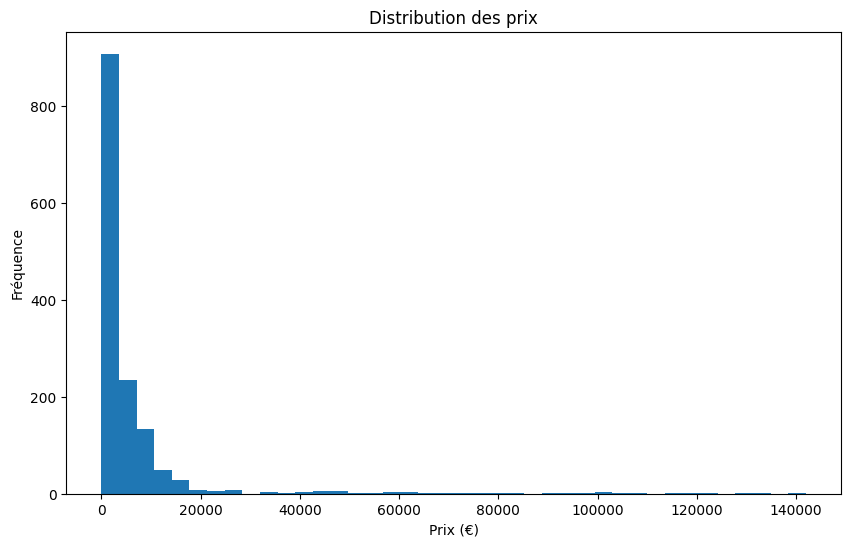

In [ ]:
# Histogramme des prix
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=40)
plt.title("Distribution des prix")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
# Prix moyen par catégorie
df.groupby("category2_code")["price"].mean().sort_values()

category2_code
NAILS                              30.200000
BRUSHES AND ACCESSORIES            42.346154
EYES                               44.885714
LIPS                               50.285714
CLEANSERS & MAKEUP REMOVERS        52.727273
SUN PROTECTION                     57.000000
BATH AND BODY                      61.027778
FACE                               69.317073
BOY DE CHANEL                      70.000000
MASSAGE ACCESSORIES                79.000000
TONERS & LOTIONS                   83.000000
BODY                               99.000000
MASKS & EXFOLIATORS               108.142857
EYE & LIP CARE                    109.166667
MISTS                             118.000000
SETS                              146.000000
MEN                               180.708333
MOISTURIZERS                      190.685714
SERUMS                            308.375000
OILS                              316.111111
WOMEN                             366.659091
EYEGLASSES                        438.75

## 1.2 Préparation des données

### 1.2.1 Prétraitement des images

In [ ]:
# Transformations pour le dataset (résize + normalisation ImageNet)
img_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # standard pour CNN / ViT
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Transformations avec augmentation (pour entraînement)
img_transform_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

### 1.2.2 Prétraitement du texte

In [ ]:
import re

def clean_text(t):
    t = t.lower()
    t = re.sub(r"[^a-z0-9äöüß ]", " ", t) 
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["title_clean"] = df["title"].apply(clean_text)

df[["title", "title_clean"]].head(10)


,title,title_clean
0,Tweed & goldfarbenes Metall Schwarz Rosa & B...,tweed goldfarbenes metall schwarz rosa bordeaux
1,n.a.,n a
2,Schwarz,schwarz
3,Silberfarben. Gläser: Braun Mit Verlauf,silberfarben gläser braun mit verlauf
4,Blau & Rosa. Gläser: Grau Mit Verlauf,blau rosa gläser grau mit verlauf
5,Schwarz. Gläser: Grau Mit Verlauf,schwarz gläser grau mit verlauf
6,Rosa & Weiß. Gläser: Rosa,rosa weiß gläser rosa
7,Silberfarben. Gläser: Bordeaux,silberfarben gläser bordeaux
8,18 Karat Weißgold Diamanten Zuchtperlen,18 karat weißgold diamanten zuchtperlen
9,Steppmotiv 18 Karat Gelbgold,steppmotiv 18 karat gelbgold


### 1.2.3. Vérification des correspondances image / texte / catégorie

In [131]:
# on regarde le nombre d'image manquantes
df["image_exists"] = df.index.map(
    lambda idx: os.path.exists(f"../data/images/{idx}.jpg")
)
df["image_exists"].value_counts()


image_exists
True     899
False    529
Name: count, dtype: int64

In [ ]:
# titres qui apparaissent dans plusieurs catégories différentes
ambiguous = df.groupby("title_clean")["category2_code"].nunique()
ambiguous[ambiguous > 1].sort_values(ascending=False).head(20)

title_clean
18 karat weißgold diamanten                                13
n a                                                         6
18 karat gelbgold diamanten                                 4
deodorant spray                                             3
18 karat weißgold und gelbgold diamanten                    3
18 karat beigegold diamanten                                3
aus 18 karat rotgold diamanten                              3
mittelgroßes modell 18 karat weißgold diamanten             3
lammleder goldfarbenes metall schwarz                       3
18 karat weißgold diamanten zuchtperlen                     3
schwarz                                                     3
18 karat weißgold diamanten zuchtperlen weißes perlmutt     2
dunkles schildpatt                                          2
duschgel                                                    2
aftershave emulsion                                         2
18 karat gelbgold diamant                                 

## 1.3 Visualisation

### 1.3.2 Exemples visuels des produits pour chaque catégorie majeure.

In [ ]:
# Top 5 catégories les plus fréquentes
top_categories = df["category2_code"].value_counts().head(5).index
top_categories


Index(['READY-TO-WEAR', 'COSTUME JEWELRY', 'SUNGLASSES', 'WOMEN', 'WATCHES'], dtype='object', name='category2_code')

In [ ]:
# Fonction pour afficher des exemples d'images par catégorie

def show_examples(cat, n=5):
    rows = df[df["category2_code"] == cat].head(n)
    plt.figure(figsize=(15,4))
    
    for i, idx in enumerate(rows.index):
        img_path = f"../data/images/{idx}.jpg"
        
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{cat}")
        else:
            plt.subplot(1, n, i+1)
            plt.text(0.5, 0.5, "Image\nindisponible", ha="center")
            plt.axis("off")
    
    plt.suptitle(f"Exemples pour la catégorie : {cat}")
    plt.show()


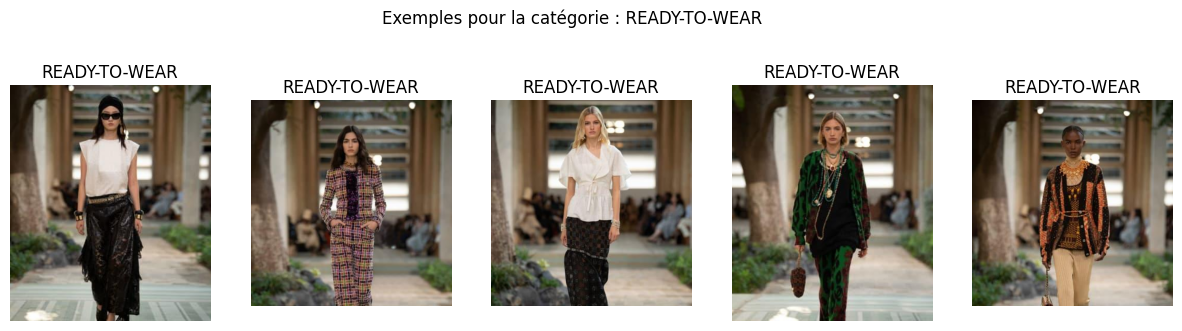

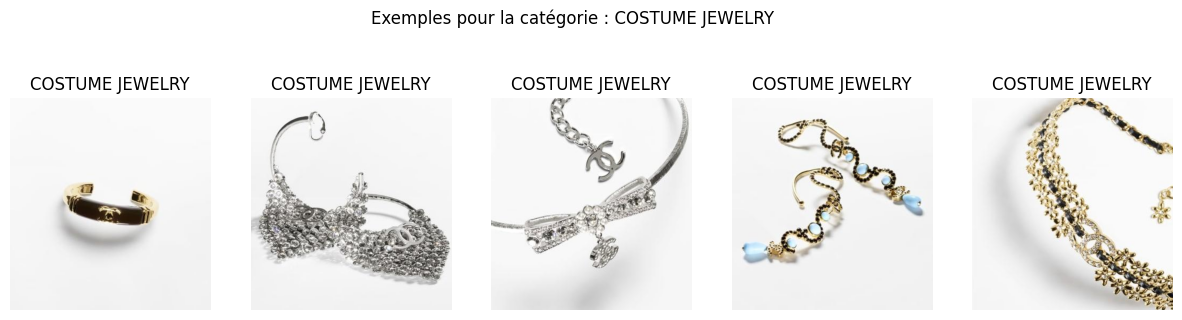

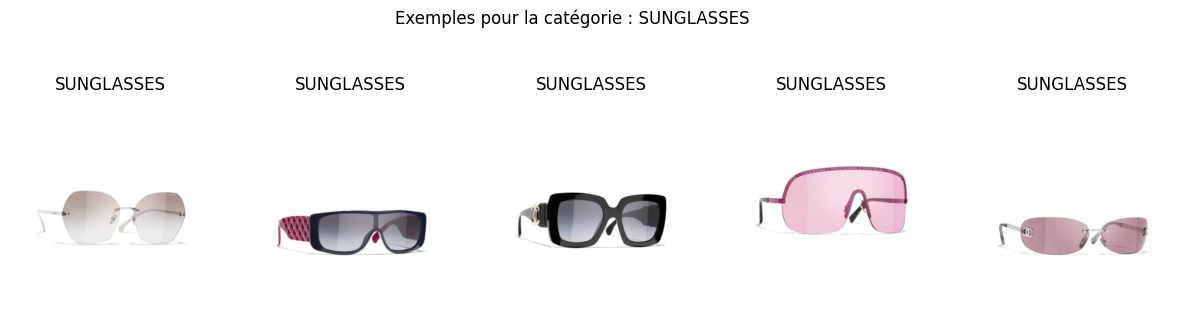

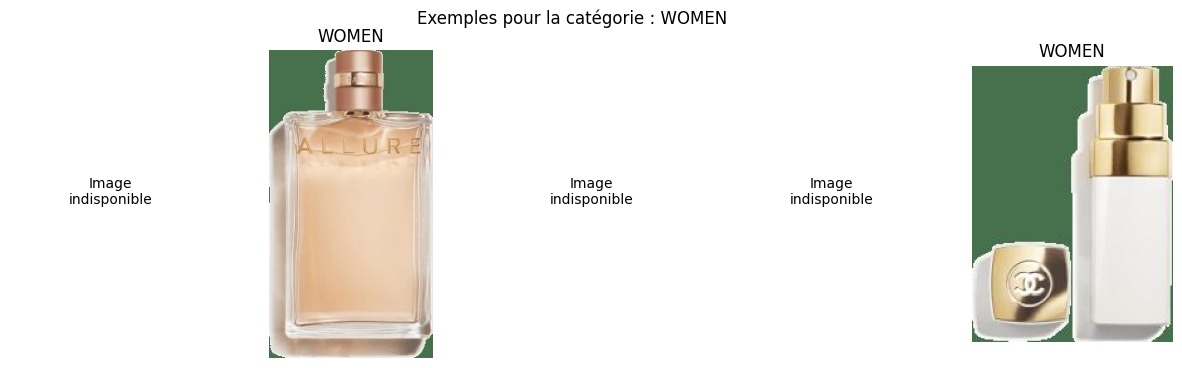

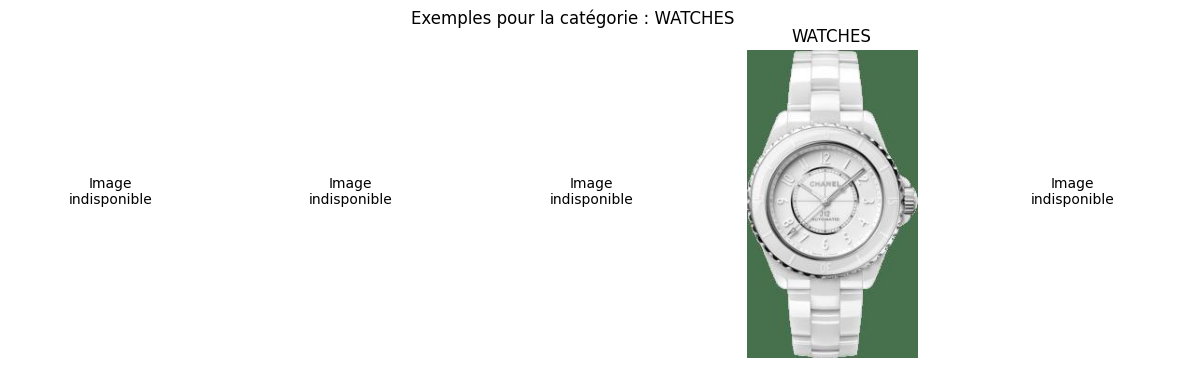

In [155]:
for cat in top_categories:
    show_examples(cat, n=5)


In [ ]:
# Analyse de la proportion d'images disponibles par catégorie

def count_images_for_category(category):
    idxs = df[df["category2_code"] == category].index
    total = len(idxs)
    available = sum(os.path.exists(f"../data/images/{i}.jpg") for i in idxs)
    return total, available

results = {}

for cat in top_categories:
    total, available = count_images_for_category(cat)
    results[cat] = {
        "total_produits": total,
        "images_disponibles": available,
        "couverture (%)": round(available / total * 100, 2)
    }

results


{'READY-TO-WEAR': {'total_produits': 243,
  'images_disponibles': 236,
  'couverture (%)': 97.12},
 'COSTUME JEWELRY': {'total_produits': 127,
  'images_disponibles': 124,
  'couverture (%)': 97.64},
 'SUNGLASSES': {'total_produits': 99,
  'images_disponibles': 90,
  'couverture (%)': 90.91},
 'WOMEN': {'total_produits': 88,
  'images_disponibles': 34,
  'couverture (%)': 38.64},
 'WATCHES': {'total_produits': 87,
  'images_disponibles': 24,
  'couverture (%)': 27.59}}

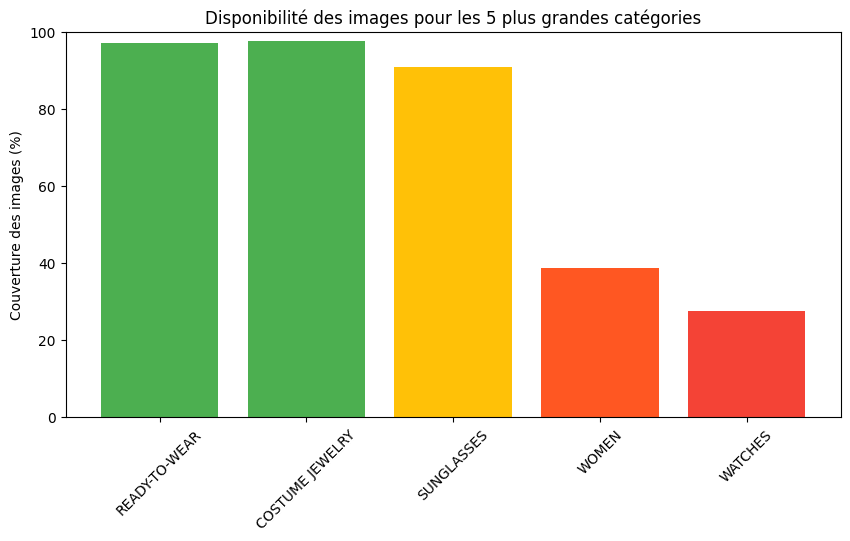

In [ ]:
# Histogramme des résultats
cats = list(results.keys())
coverage = [results[c]["couverture (%)"] for c in cats]

plt.figure(figsize=(10,5))
plt.bar(cats, coverage, color=['#4CAF50', '#4CAF50', '#FFC107', '#FF5722', '#F44336'])
plt.ylabel("Couverture des images (%)")
plt.title("Disponibilité des images pour les 5 plus grandes catégories")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()
